<a href="https://colab.research.google.com/github/FabianaDutra/ImersaoDados_ALURA/blob/main/ALURA_IMERSAO_DADOS_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###IMPORTS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### PARAMETROS

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
pd.set_option("display.precision",2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#<b>AULA 01</b>

## CARREGANDO OS DADOS

In [ ]:
df = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


## ANALISANDO OS DADOS:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.00,10008.00,10008.00,10008.00
mean,442.30,3.48,3.88,4.10
std,7515.38,1.06,1.99,2.82
min,10.00,1.00,1.00,1.00
25%,173.00,3.00,2.00,2.00
50%,290.00,3.00,4.00,4.00
75%,460.25,4.00,5.00,5.00
max,750000.00,16.00,40.00,50.00


In [ ]:
df.sample(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3616,NaN,Jardim Guedala,São Paulo,455,3,4,7,R$ 3.400.000
335,NaN,Jardim Santo Amaro,São Paulo,440,4,4,2,R$ 12.000\n /Mês
5407,NaN,Parque Santa Rita,São Paulo,210,3,2,3,R$ 550.000
6550,NaN,Campininha,São Paulo,102,2,1,1,R$ 470.000
4372,Rua Rumaica,Vila Ipojuca,São Paulo,161,3,2,2,R$ 900.000


In [ ]:
df.shape

(10008, 8)

### <b>OBSERVAÇÕES:</b>

- BASE DADOS apresentando valores nulos/faltantes nos campos Rua e Bairro a serem tratados.
- Campo VALOR representado como objeto(string) precisa ser convertido para FLOAT

### RUA

In [ ]:
print("Variável RUA possui:",df["Rua"].isnull().value_counts()[0]," valores validos/preenchidos.\n")
print("Variável RUA possui:",df["Rua"].isnull().value_counts()[1]," valores em branco/ não preenchidos.\n")

Variável RUA possui: 6574  valores validos/preenchidos.

Variável RUA possui: 3434  valores em branco/ não preenchidos.



In [ ]:
print("Variável RUA possui:",len(df["Rua"].unique())," valores distintos preenchidos.\n")


Variável RUA possui: 3131  valores distintos preenchidos.



### BAIRRO

In [ ]:
print("Variável BAIRRO possui:",len(df["Bairro"].unique())," valores distintos preenchidos.\n")


Variável BAIRRO possui: 702  valores distintos preenchidos.



### CIDADE

In [ ]:
print("Variável CIDADE possui:",df["Cidade"].count(), "registros.\n",len(df["Cidade"].unique()),"valor distinto preenchidos -> ", df["Cidade"].unique()[0], "\n")

Variável CIDADE possui: 10008 registros.
 1 valor distinto preenchidos ->  São Paulo 



### METRAGEM

In [ ]:
print( "Variável METRAGEM possui:", df["Cidade"].count(), "registros.\nValores distinto preenchidos:  ", len(df["Metragem"].unique() ) )

print("\nA media de metragem dos imoveis é de: {:.2f} m2 ".format( df["Metragem"].mean()))


Variável METRAGEM possui: 10008 registros.
Valores distinto preenchidos:   916

A media de metragem dos imoveis é de: 442.30 m2 


In [ ]:
df["Metragem"].describe()

count    10008.00
mean       442.30
std       7515.38
min         10.00
25%        173.00
50%        290.00
75%        460.25
max     750000.00
Name: Metragem, dtype: float64

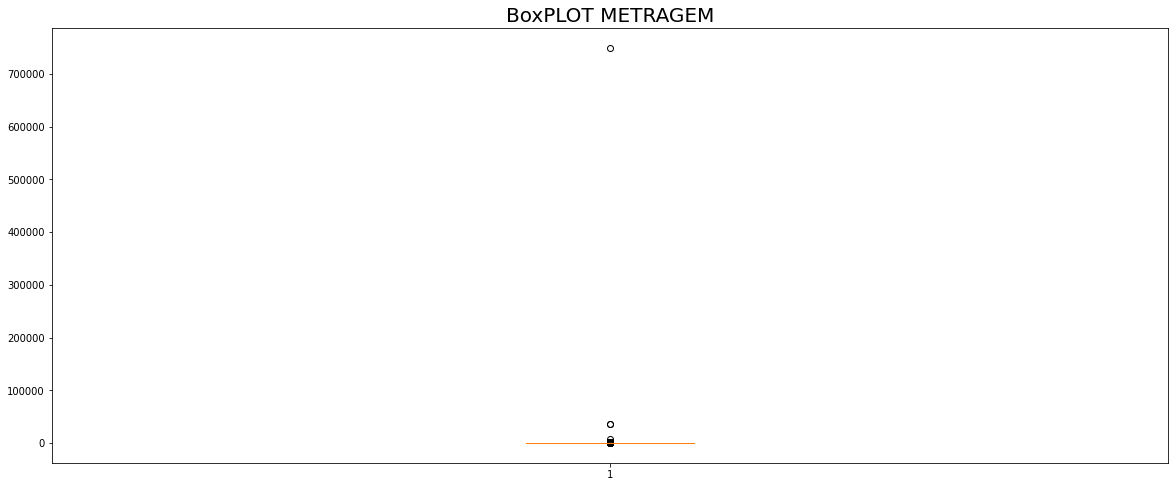

In [ ]:
plt.boxplot(df["Metragem"])
plt.title("BoxPLOT METRAGEM",fontsize = 20)
plt.show()

In [ ]:
df.loc[(df["Metragem"] > 5000)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000
6883,NaN,Jardim da Glória,São Paulo,35677,3,3,4,R$ 2.550.000
7930,"Rua Duque de Caxias, 298",Santo Amaro,São Paulo,7126,7,2,20,R$ 80.000\n /Mês
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000


In [ ]:
df.loc[(df["Metragem"] < 30)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
5009,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,20,3,2,2,R$ 800.000
5059,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,25,3,2,2,R$ 800.000
5652,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,25,3,2,2,R$ 800.000
8553,Rua Barra da Jangada,Parada Inglesa,São Paulo,29,1,1,1,R$ 300.000
9603,Rua Pestana,Vila Guaca,São Paulo,10,3,2,2,R$ 800.000


METRAGEM apresenta alguns outliers:
- acima de 5000 metros, talvez um erro de registro, principalmente quanto ao registro com metragem 750000
- abaixo de 30 metros com 3 quartos, algo estranho.

### QUARTOS

In [ ]:
print( "Variável QUARTOS possui:", df["Quartos"].count(), "registros.\nValores distinto preenchidos:  ", len(df["Quartos"].unique() ) )

Variável QUARTOS possui: 10008 registros.
Valores distinto preenchidos:   15


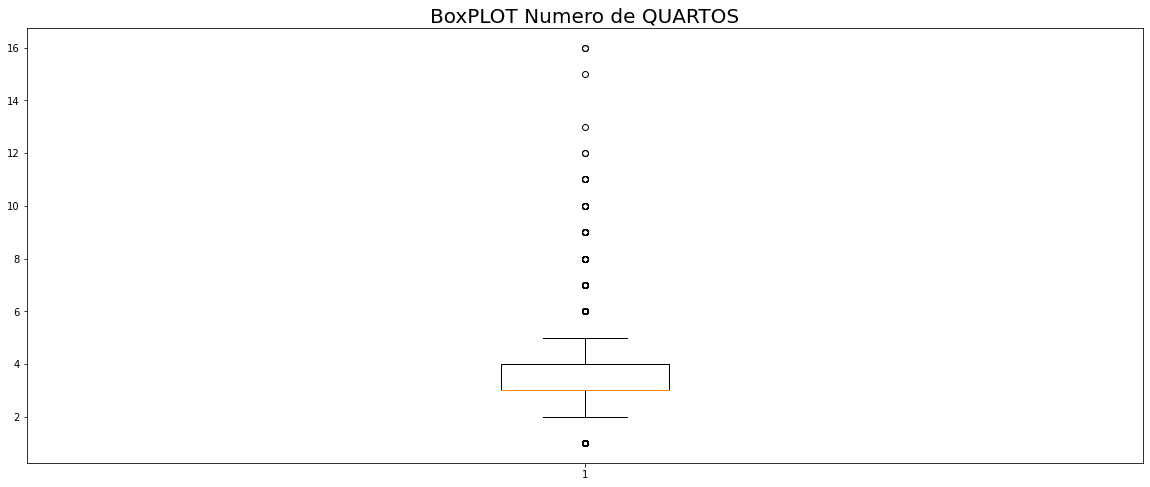

In [ ]:
plt.boxplot(df["Quartos"])
plt.title("BoxPLOT Numero de QUARTOS",fontsize = 20)
plt.show()


In [ ]:
df.query("Quartos <= 1")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
130,Rua Bernardo Vieira,Vila Laís,São Paulo,104,1,1,1,R$ 270.000
185,Rua Quirino Pucca,Vila Romana,São Paulo,65,1,1,2,R$ 480.000
321,NaN,Alto da Lapa,São Paulo,135,1,2,4,R$ 1.550.000
369,Rua Rodolfo Arena,Vila Moraes,São Paulo,54,1,1,2,R$ 305.000
405,NaN,Vila Madalena,São Paulo,35,1,1,1,R$ 2.800\n /Mês
...,...,...,...,...,...,...,...,...
9292,Rua Diamante Preto,Chácara Califórnia,São Paulo,120,1,1,3,R$ 420.000
9653,Rua Victória Simionato,Vila Paranaguá,São Paulo,45,1,1,1,R$ 160.000
9658,"Avenida Ouro Verde de Minas, 1948",Jardim Imperador (Zona Leste),São Paulo,292,1,1,4,R$ 646.761
9835,"Rua São Pompônio, , 53",Vila Oratório,São Paulo,120,1,1,6,R$ 426.000


In [ ]:
df.loc[(df["Quartos"] < 1)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor


In [ ]:
df.query("Quartos >5")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
18,"Rua Graham Bell, 332",Santo Amaro,São Paulo,772,7,7,6,R$ 2.700.000
113,"Rua Araripe, 145",Vila Califórnia,São Paulo,300,6,3,2,R$ 430.000
166,Rua Doutor Antônio Gontijo de Carvalho,Jardim Cordeiro,São Paulo,1200,6,7,8,R$ 6.360.000
170,Rua Manuel Francisco Alves,Parque Casa de Pedra,São Paulo,232,8,3,1,R$ 500.000
196,Rua Constantino de Sousa,Campo Belo,São Paulo,266,6,6,6,R$ 1.750.000
...,...,...,...,...,...,...,...,...
9932,Rua Guararema,Bosque da Saúde,São Paulo,600,8,7,5,R$ 2.300.000
9962,Rua Eduardo Lobo,Parque Imperial,São Paulo,125,6,3,3,R$ 951.000
9968,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
9998,Rua Eduardo Lobo,Parque Imperial,São Paulo,125,6,3,3,R$ 951.000


In [ ]:
df.loc[(df["Quartos"] >5)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
18,"Rua Graham Bell, 332",Santo Amaro,São Paulo,772,7,7,6,R$ 2.700.000
113,"Rua Araripe, 145",Vila Califórnia,São Paulo,300,6,3,2,R$ 430.000
166,Rua Doutor Antônio Gontijo de Carvalho,Jardim Cordeiro,São Paulo,1200,6,7,8,R$ 6.360.000
170,Rua Manuel Francisco Alves,Parque Casa de Pedra,São Paulo,232,8,3,1,R$ 500.000
196,Rua Constantino de Sousa,Campo Belo,São Paulo,266,6,6,6,R$ 1.750.000
...,...,...,...,...,...,...,...,...
9932,Rua Guararema,Bosque da Saúde,São Paulo,600,8,7,5,R$ 2.300.000
9962,Rua Eduardo Lobo,Parque Imperial,São Paulo,125,6,3,3,R$ 951.000
9968,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
9998,Rua Eduardo Lobo,Parque Imperial,São Paulo,125,6,3,3,R$ 951.000


### BANHEIROS

In [ ]:
print( "Variável Banheiros possui:", df["Banheiros"].count(), "registros.\nValores distinto preenchidos:  ", len(df["Banheiros"].unique() ) )

Variável Banheiros possui: 10008 registros.
Valores distinto preenchidos:   15


In [ ]:
df.query("Banheiros > 5")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
18,"Rua Graham Bell, 332",Santo Amaro,São Paulo,772,7,7,6,R$ 2.700.000
27,"Rua Andrade Neves, 37",Bela Aliança,São Paulo,502,4,6,4,R$ 2.985.000
28,Rua Japeacaba,Vila Albertina,São Paulo,268,3,6,4,R$ 1.700.000
29,Rua Senador Vergueiro,Santo Amaro,São Paulo,355,4,7,4,R$ 3.100.000
...,...,...,...,...,...,...,...,...
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000
9997,Rua Tapes,Jardim Aeroporto,São Paulo,157,5,7,4,R$ 840.000
9999,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000


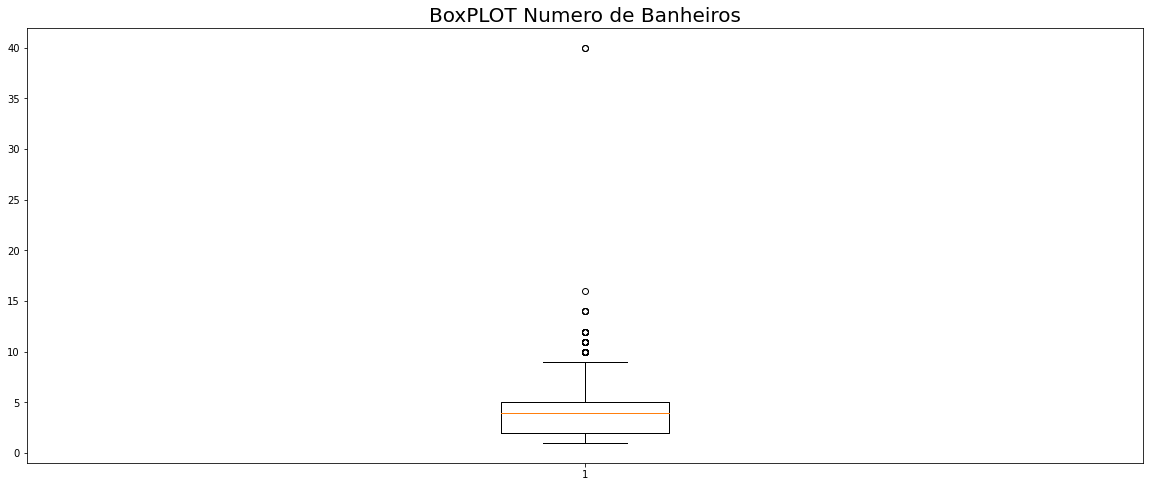

In [ ]:
plt.boxplot(df["Banheiros"])
plt.title("BoxPLOT Numero de Banheiros",fontsize = 20)
plt.show()

In [ ]:
df["Banheiros"].unique()

array([ 8,  4,  3,  2,  1,  5,  7,  6,  9, 10, 11, 12, 40, 14, 16])

In [ ]:
df.query("Banheiros in [40]")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,R$ 2.600.000
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,R$ 2.600.000


BANHEIROS apresenta outliers:
- Dois registros com 40 banheiros em imoveis com metragem de 488 metros quadrados......

### VAGAS

In [ ]:
print( "Variável VAGAS possui:", df["Vagas"].count(), "registros.\nValores distinto preenchidos:  ", len(df["Vagas"].unique() ) )

Variável VAGAS possui: 10008 registros.
Valores distinto preenchidos:   28


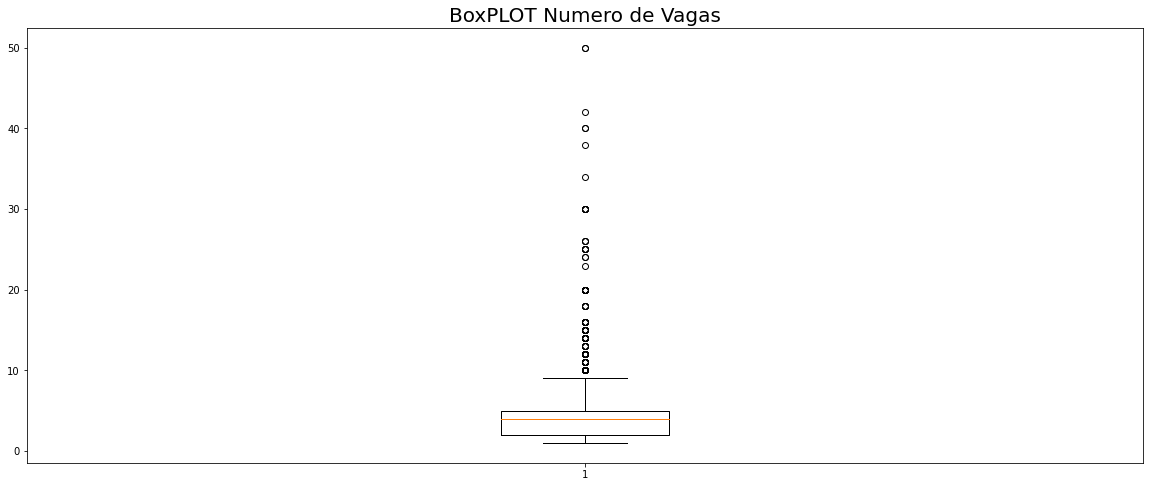

In [ ]:
plt.boxplot(df["Vagas"])
plt.title("BoxPLOT Numero de Vagas",fontsize = 20)
plt.show()

In [ ]:
df["Vagas"].unique()

array([ 6,  4,  2,  1,  3,  5,  8,  7, 10, 12,  9, 20, 13, 15, 25, 14, 18,
       11, 38, 30, 26, 24, 16, 42, 34, 23, 40, 50])

In [ ]:
df.query("Vagas in [30,34,38,40,42,50]")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1586,Rua Araruba,Praia da Lagoa,São Paulo,600,4,5,38,R$ 7.500.000
1598,Rua Desembargador Paulo Passaláqua,Pacaembu,São Paulo,826,7,7,30,R$ 8.000.000
2513,NaN,Vila Tramontano,São Paulo,1650,6,16,42,R$ 100.000\n /Mês
2739,NaN,Cidade Jardim,São Paulo,1530,5,5,30,R$ 90.000\n /Mês
2769,NaN,Cidade Jardim,São Paulo,1535,5,5,30,R$ 90.000\n /Mês
2837,NaN,Morumbi,São Paulo,1327,3,8,34,R$ 120.000\n /Mês
3098,NaN,Pacaembu,São Paulo,1490,5,11,40,R$ 25.000\n /Mês
3385,NaN,Pacaembu,São Paulo,1495,5,11,40,R$ 25.000\n /Mês
4969,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,500,4,10,50,R$ 3.700.000
5450,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,505,4,10,50,R$ 3.700.000


VAGAS apresenta alguns outliers:
- Acima de 30 vagas
- Apesenta um registro duplicado ( index: 4969 e 5450)

## <b>DESAFIOS</b>

### <b>0. DESAFIO:</b> Encontrar a Média da metragem para "Vila Mariana"

In [ ]:
df.loc[(df["Bairro"] == "Vila Mariana")].describe()

,Metragem,Quartos,Banheiros,Vagas
count,184.00,184.00,184.00,184.00
mean,233.62,3.38,3.23,2.93
std,91.47,0.98,1.31,1.80
min,60.00,1.00,1.00,1.00
25%,166.00,3.00,2.00,2.00
50%,235.50,3.00,3.00,2.00
75%,285.00,4.00,4.00,4.00
max,650.00,11.00,8.00,10.00


In [ ]:
print("*************************************************************")
print("Imoveis na 'Vila Mariana'\n")
print("Numero de Imoveis - {} ".format( sum(df["Bairro"] == "Vila Mariana")))
print("Média da metragem - {:.2f} - M2".format( df.loc[(df["Bairro"] == "Vila Mariana")].describe()["Metragem"][1]))
print("Mediana da metragem - {:.2f} - M2\n".format( df.loc[(df["Bairro"] == "Vila Mariana")].describe()["Metragem"][5]))
print("*************************************************************")

*************************************************************
Imoveis na 'Vila Mariana'

Numero de Imoveis - 184 
Média da metragem - 233.62 - M2
Mediana da metragem - 235.50 - M2

*************************************************************


### <b>1. DESAFIO:</b> Encontrar a Média da metragem para cada um dos bairros

In [ ]:
df_por_bairros_media = df.groupby(df["Bairro"])["Metragem"].mean()
df_por_bairros_mediana = df.groupby(df["Bairro"])["Metragem"].median()
bairro_media_mediana = pd.concat([df_por_bairros_media.rename("Media"), df_por_bairros_mediana.rename("Mediana")], axis = 1)
bairro_media_mediana.sort_values(by='Media', ascending=False)

,Media,Mediana
Bairro,,
Sítio Represa,37000.00,37000.00
Vila Castelo,2850.00,2850.00
Jardim Guedala,2486.64,580.00
Jardim das Camélias,1700.00,1700.00
Chácara Flora,1260.73,1300.00
...,...,...
Cidade Antônio Estevão de Carvalho,57.50,57.50
Jardim Nova Germania,57.00,57.00
Jardim Benfica,48.00,48.00


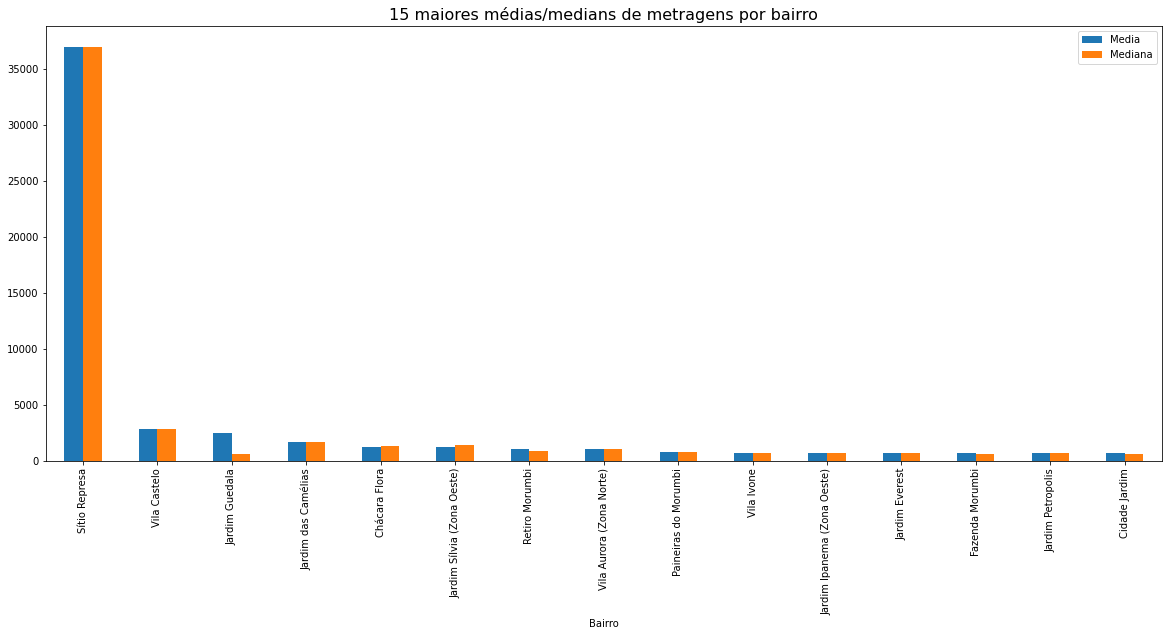

In [ ]:
bairro_media_mediana.sort_values(by='Media', ascending=False)[0:15].plot.bar()
plt.title("15 maiores médias/medians de metragens por bairro",fontsize = 16)
plt.show()

In [ ]:
df.loc[(df["Bairro"] == "Sítio Represa")]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000


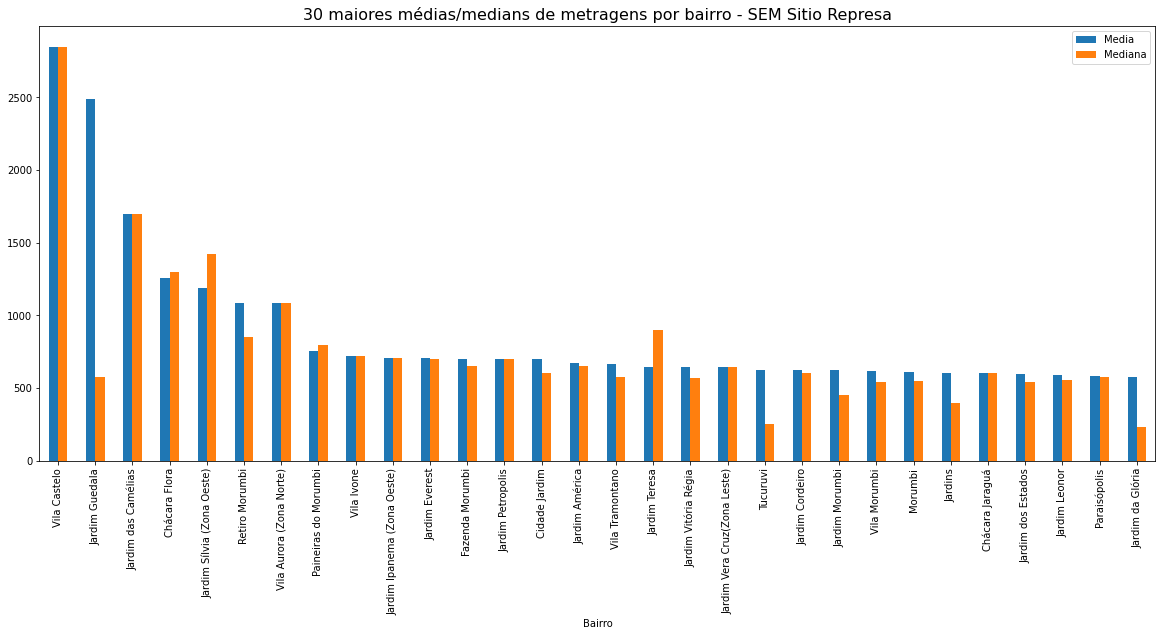

In [ ]:
bairro_media_mediana.sort_values(by='Media', ascending=False)[1:31].plot.bar()
plt.title("30 maiores médias/medians de metragens por bairro - SEM Sitio Represa",fontsize = 16)
plt.show()

Comparativo Media/Mediana por bairros. 
Observa-se uma diferença grande entre os dados de Sitio Represa ,que possui apenas um imovel, com uma metragem alta, e os outros bairros.

Além disso, alguns bairros apresentam grande difereça entre media e mediana, como Jardim Guedala, Tucuruvi e Jardim da Glória, que precisam ser analisados com mais detalhes.

###<b>2. DESAFIO:</b> Duas formas de selecionar os dados por bairro

In [ ]:
# Utilizando o loc.

df.loc[df["Bairro"]=="Jardins"]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1951,Rua Prudente Correia,Jardins,São Paulo,290,4,6,2,R$ 5.100.000
3886,Rua Luís Pereira de Almeida,Jardins,São Paulo,360,3,4,4,R$ 3.500.000
3910,Rua Luís Pereira de Almeida,Jardins,São Paulo,365,3,4,4,R$ 3.500.000
4283,Rua Luís Pereira de Almeida,Jardins,São Paulo,400,4,3,8,R$ 2.700.000
8430,"Rua Luís Pereira de Almeida, 72",Jardins,São Paulo,400,4,3,5,R$ 2.700.000
9465,Rua Jacarezinho,Jardins,São Paulo,1200,6,7,8,R$ 19.800.000
9589,Rua Jacarezinho,Jardins,São Paulo,1205,6,7,8,R$ 19.800.000


In [ ]:
# Utilizando o query
df.query("Bairro == 'Morumbi'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
171,Rua Luís Dib Zogaib,Morumbi,São Paulo,443,4,6,8,R$ 1.800.000
191,NaN,Morumbi,São Paulo,1800,3,5,6,R$ 80.000\n /Mês
213,Rua Emílio Pedutti,Morumbi,São Paulo,546,4,7,6,R$ 3.290.000
343,"Avenida Comendador Adibo Ares, 1230",Morumbi,São Paulo,686,5,6,5,R$ 3.350.000
377,NaN,Morumbi,São Paulo,566,4,7,8,R$ 3.500.000
...,...,...,...,...,...,...,...,...
9486,Rua Almirante Soares Dutra,Morumbi,São Paulo,499,4,8,5,R$ 3.800.000
9527,Avenida Comendador Adibo Ares,Morumbi,São Paulo,1000,5,8,6,R$ 3.350.000
9555,Rua Almirante Soares Dutra,Morumbi,São Paulo,558,4,7,8,R$ 4.800.000
9628,Rua Almirante Soares Dutra,Morumbi,São Paulo,504,4,8,5,R$ 3.800.000


### <b>3. DESAFIO:</b> Explorar alguns gráficos e aplicar nas demais colunas do dataframe, tentar colocar alguma conclusão

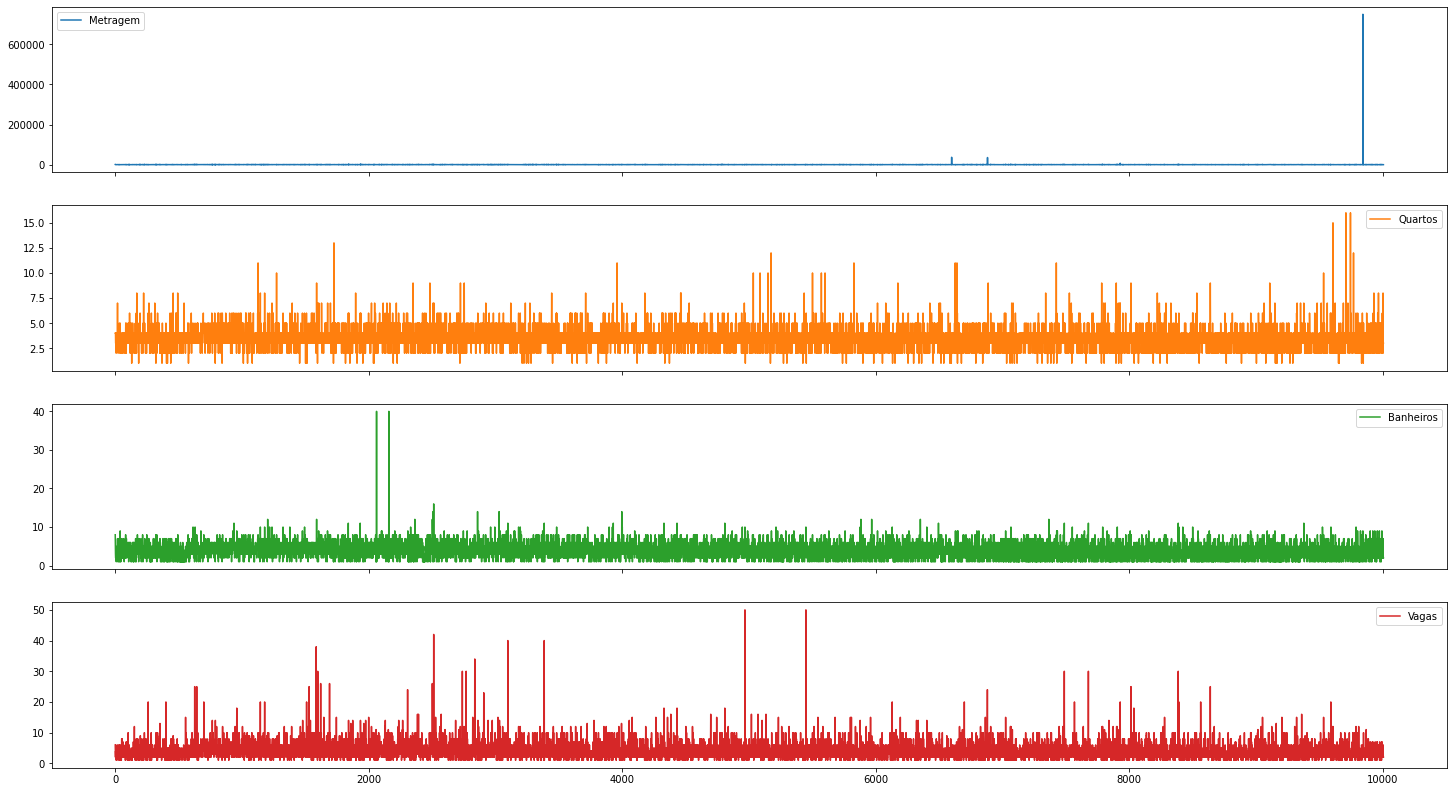

In [ ]:
plt.rcParams["figure.figsize"] = (25,14)
df.plot(subplots=True);

### <b> 4. DESAFIO:</b> Pegar outros estatisticas dos dados, media, mediana, min, max

In [ ]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.00,10008.00,10008.00,10008.00
mean,442.30,3.48,3.88,4.10
std,7515.38,1.06,1.99,2.82
min,10.00,1.00,1.00,1.00
25%,173.00,3.00,2.00,2.00
50%,290.00,3.00,4.00,4.00
75%,460.25,4.00,5.00,5.00
max,750000.00,16.00,40.00,50.00


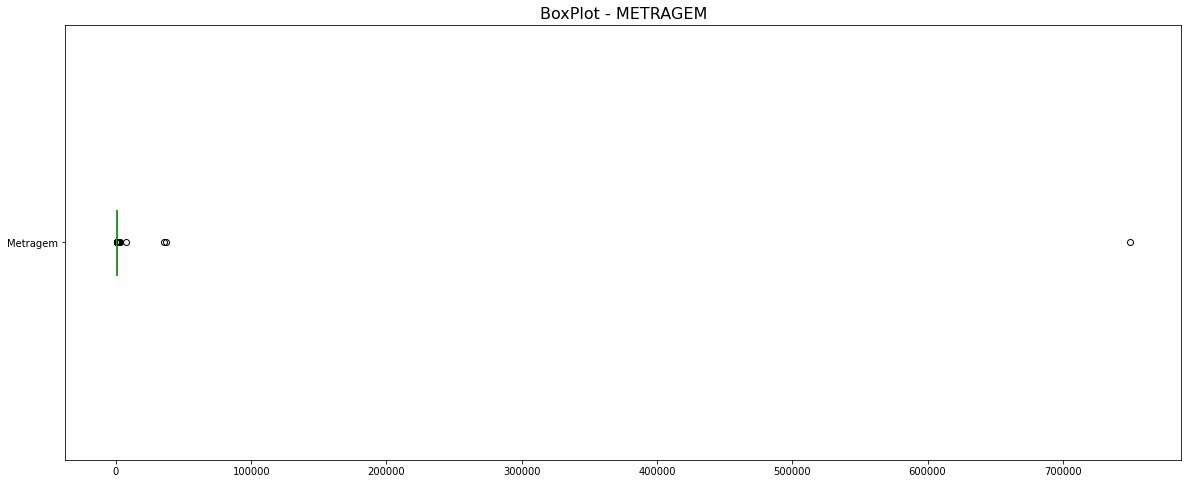

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
df[["Metragem"]].plot.box(vert=False, positions=[1])
plt.title("BoxPlot - METRAGEM",fontsize=16)
plt.show()

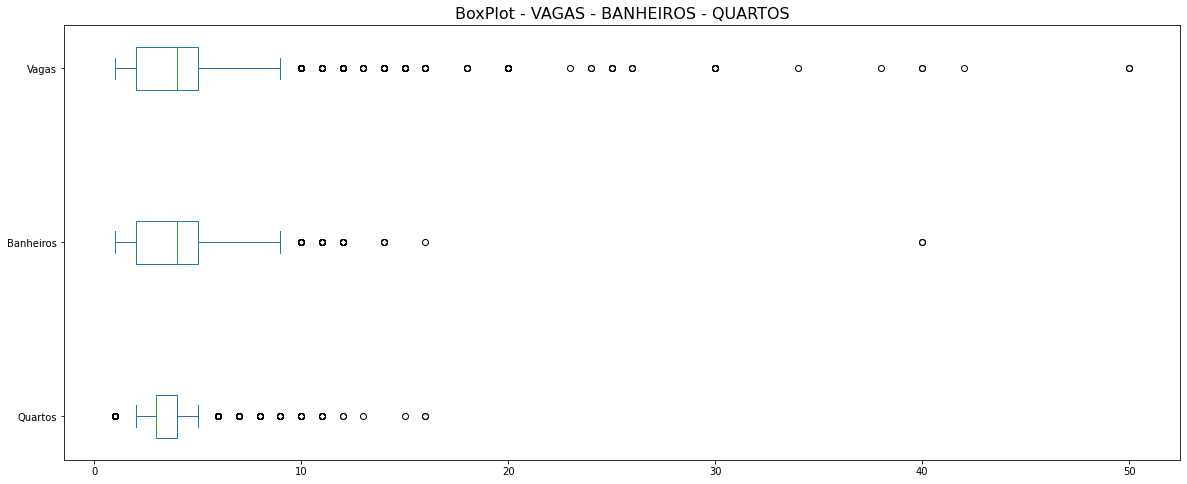

In [ ]:
df[["Quartos","Banheiros", "Vagas"]].plot.box(vert=False, positions=[1, 3, 5])
plt.title("BoxPlot - VAGAS - BANHEIROS - QUARTOS",fontsize=16)
plt.show()

Observa-se grande diferença entre media e mediana da metragem, provavelmente indicando presença de outliers.
Os dados de quartos, banheiros e vagas aparesentam valores máximos, bem distantes da media.
OS dados de valor apresentam aluns valores bem distantes da média, indicando, talvez, outliers.

### <b>5. DESAFIO:</b> Identificar quais os bairros que possuem ruas faltantes (sem nome)

In [ ]:
df.loc[df["Rua"].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,R$ 15.000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,R$ 849.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,R$ 400.000
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,R$ 750.000
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000


In [ ]:
df.loc[df["Rua"].isnull()].groupby(["Bairro"]).count()

,Rua,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
Bairro,,,,,,,
Aclimação,0,2,2,2,2,2,2
Alto da Boa Vista,0,1,1,1,1,1,1
Alto da Lapa,0,29,29,29,29,29,29
Alto da Mooca,0,5,5,5,5,5,5
Alto de Pinheiros,0,169,169,169,169,169,169
...,...,...,...,...,...,...,...
Vila do Encontro,0,3,3,3,3,3,3
Água Branca,0,2,2,2,2,2,2
Água Fria,0,1,1,1,1,1,1


In [ ]:
bairros_rua_nan = df.loc[df["Rua"].isnull()].groupby(["Bairro"]).count().sort_values(by='Cidade', ascending=False)["Cidade"]
imoveis_por_bairro = df.groupby(["Bairro"]).count().sort_values(by='Cidade', ascending=False)["Cidade"]
bairro_rua = pd.concat([imoveis_por_bairro.rename("N_imoveis"),bairros_rua_nan.rename("Com_rua_sem_id")] , axis=1, join='outer')
bairro_rua.fillna(0,axis=1,inplace=True)
bairro_rua

,N_imoveis,Com_rua_sem_id
Bairro,,
Alto de Pinheiros,409,169.00
Jardim Guedala,403,190.00
Jardim Paulista,309,138.00
Brooklin Paulista,247,75.00
Jardim Europa,240,128.00
...,...,...
Vila Fernandes,1,0.00
Vila Fiat Lux,1,0.00
Educandário,1,0.00


In [ ]:
bairro_rua.query("Com_rua_sem_id == 1")

,N_imoveis,Com_rua_sem_id
Bairro,,
Jardim Aeroporto,26,1.00
Jardim Brasil (Zona Sul),16,1.00
Água Fria,12,1.00
Chácara Belenzinho,10,1.00
Jardim das Vertentes,10,1.00
...,...,...
Vila Constancia,1,1.00
Jardim das Camélias,1,1.00
Vila Darli,1,1.00


In [ ]:
bairro_rua.loc[ ( bairro_rua["Com_rua_sem_id"] == 1)  & ( bairro_rua["N_imoveis"] == 1) ]

,N_imoveis,Com_rua_sem_id
Bairro,,
Vila Sabrina,1,1.00
Vila Virginia,1,1.00
Vila Nova Pauliceia,1,1.00
Jardim Marília,1,1.00
Jardim Rizzo,1,1.00
Jardim Rincão,1,1.00
Vila Vasconcelos,1,1.00
Vila Salete,1,1.00
Jardim Santa Cruz (Campo Grande),1,1.00


In [ ]:
bairro_rua.loc[ ( bairro_rua["Com_rua_sem_id"] == 1)  & ( bairro_rua["N_imoveis"] == 1) ].count()

N_imoveis         52
Com_rua_sem_id    52
dtype: int64

Encontrados 52 bairros com registro de apenas um imovel e este imovel numa rua sem identificação.

# <b>AULA 02</b>

### VALOR

Tratamento da variavel Valor, e mudanca para float

In [ ]:
len(df["Valor"].unique())

1041

Opção 1 - Tratamento da Variavel Valor

In [ ]:
#df["Valor"] = df["Valor"].str.replace(".","")
#df["Valor"] = df["Valor"].str.replace("R","")
#df["Valor"] = df["Valor"].str.replace("$","")
#df["Valor"] = df["Valor"].str.replace("/Mês","")
#df["Valor"] = df["Valor"].str.replace("/Ano","")
#df["Valor"] = df["Valor"].str.replace("/Dia","")
#df["Valor"] = df["Valor"].str.replace("\n","")
#df["Valor"] = df["Valor"].str.replace("\t","")
#df["Valor"] = df["Valor"].str.replace("                      ","")
#df["Valor"] = df["Valor"].str.replace(" ","")
#df["Valor"] =round(pd.to_numeric(df["Valor"], errors = "coerce"),2)

Opção 2 - Tratamento da Variavel Valor

In [ ]:
df["Valor"][0]

'R$ 7.000.000'

In [ ]:
df["Valor"][0].split()

['R$', '7.000.000']

In [ ]:
df["Valor"].str.split()

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

In [ ]:
df["Valor"].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [ ]:
df["Valor"].str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

In [ ]:
df["Valor"].str.split(expand = True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [ ]:
len(df["Valor"].str.split(expand = True)[1].unique())

1038

In [ ]:
df["Valor"].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [ ]:
df[["Moeda","Valor_anuncio","Tipo_anuncio"]] = df["Valor"].str.split(expand = True)

In [ ]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [ ]:
df["Valor_anuncio"] = df["Valor_anuncio"].str.replace(".","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000,None


In [ ]:
df["Tipo_anuncio"].isnull()

0         True
1         True
2         True
3         True
4         True
         ...  
10003     True
10004     True
10005     True
10006    False
10007     True
Name: Tipo_anuncio, Length: 10008, dtype: bool

In [ ]:
df_filtrado = df[df["Tipo_anuncio"].isnull()]

In [ ]:
df.shape

(10008, 11)

In [ ]:
df_filtrado.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000,None


In [ ]:
df_filtrado.shape

(9156, 11)

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [ ]:
df_filtrado["Valor_anuncio"] = df_filtrado["Valor_anuncio"].astype(float)

In [ ]:
df_filtrado

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None


In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6107 non-null   object 
 1   Bairro         9146 non-null   object 
 2   Cidade         9156 non-null   object 
 3   Metragem       9156 non-null   int64  
 4   Quartos        9156 non-null   int64  
 5   Banheiros      9156 non-null   int64  
 6   Vagas          9156 non-null   int64  
 7   Valor          9156 non-null   object 
 8   Moeda          9156 non-null   object 
 9   Valor_anuncio  9156 non-null   float64
 10  Tipo_anuncio   0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


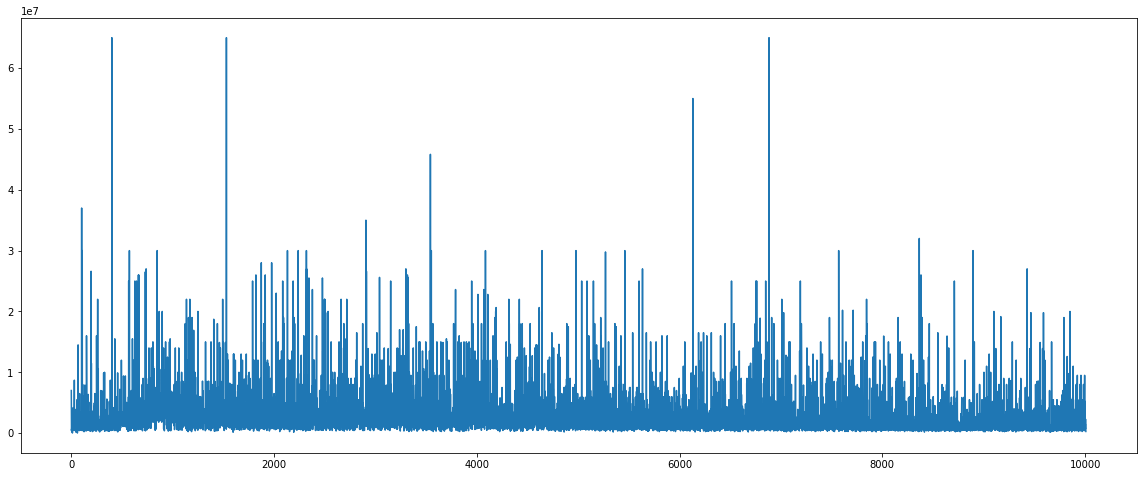

In [ ]:
plt.plot(df_filtrado["Valor_anuncio"])
plt.show()

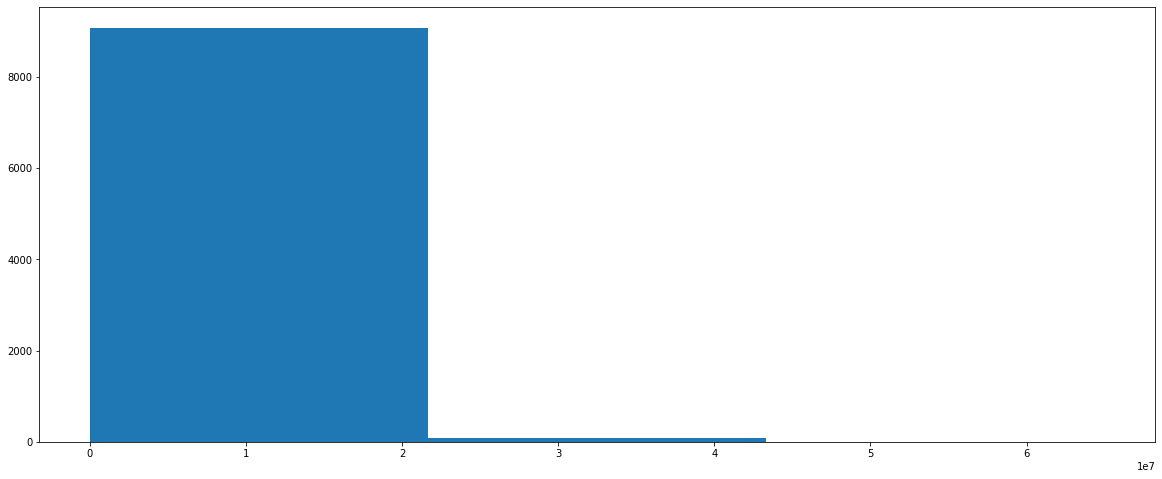

In [ ]:
plt.hist(x=df_filtrado["Valor_anuncio"], bins = 3)
plt.show()

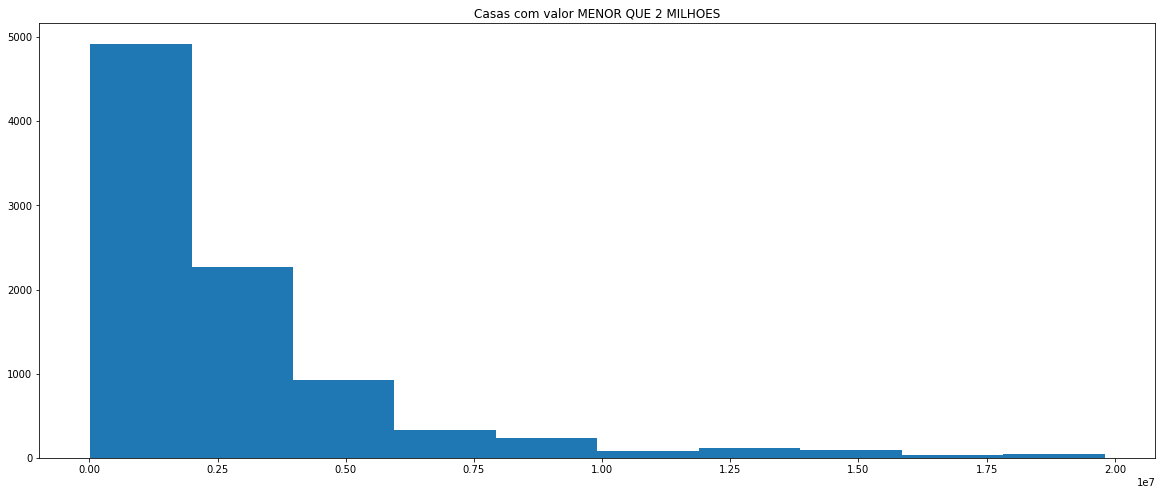

In [ ]:
valor_menor_2m = df_filtrado.query("Valor_anuncio < 20000000")
plt.hist(valor_menor_2m["Valor_anuncio"])
plt.title("Casas com valor MENOR QUE 2 MILHOES")
plt.show()

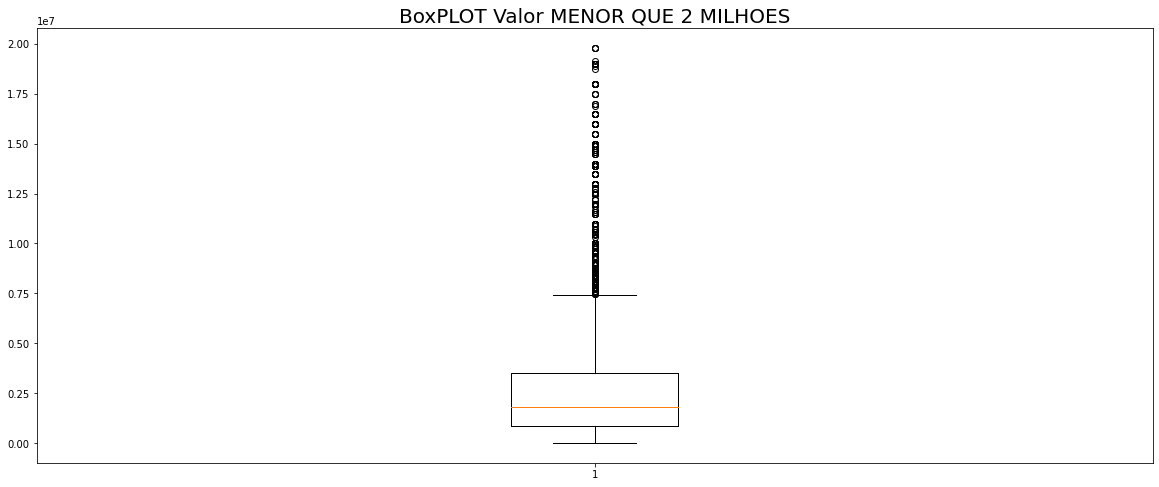

In [ ]:
plt.boxplot(valor_menor_2m["Valor_anuncio"])
plt.title("BoxPLOT Valor MENOR QUE 2 MILHOES",fontsize = 20)
plt.show()

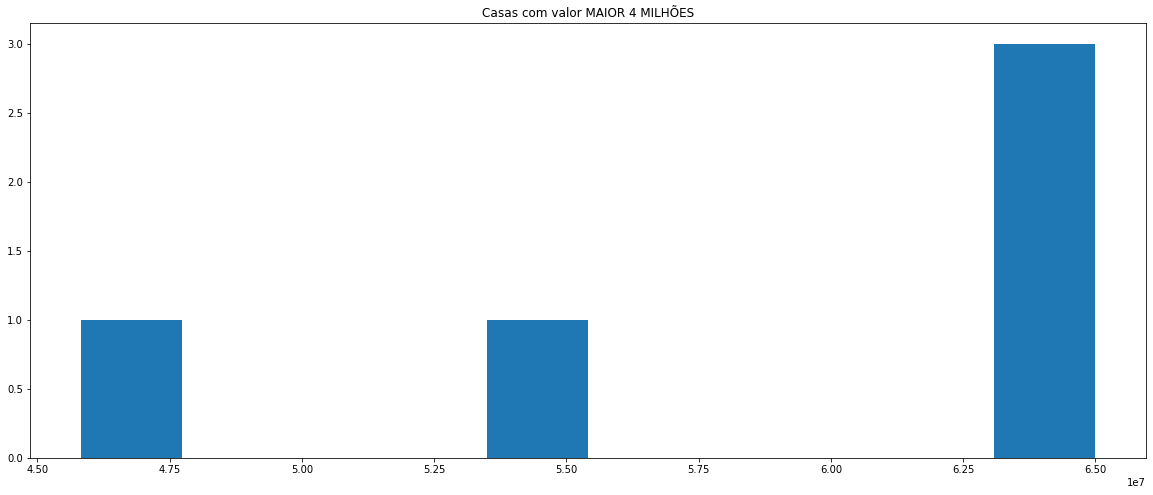

In [ ]:
valor_maior_4m = df_filtrado.query("Valor_anuncio > 40000000")
plt.hist(valor_maior_4m["Valor_anuncio"])
plt.title("Casas com valor MAIOR 4 MILHÕES")
plt.show()

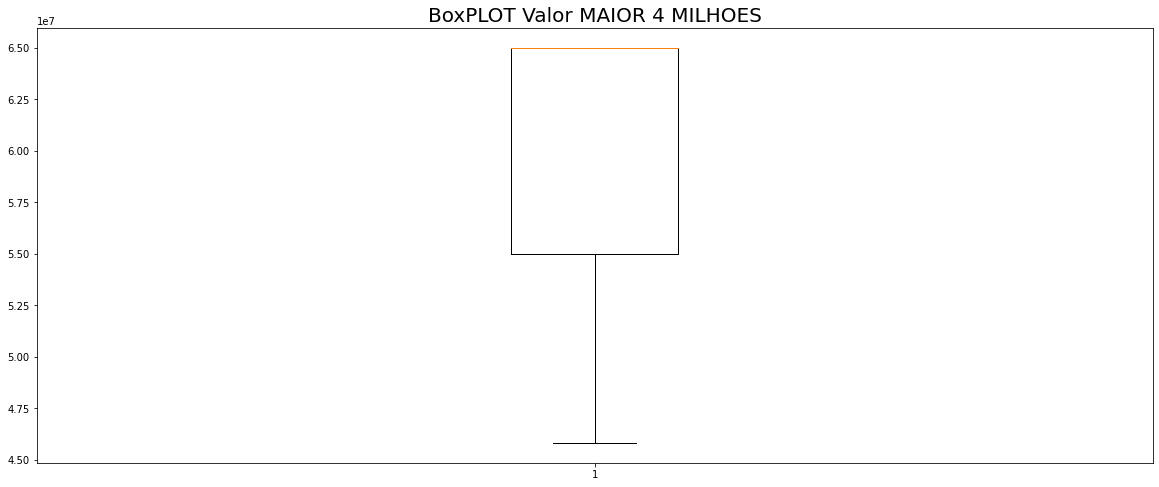

In [ ]:
plt.boxplot(valor_maior_4m["Valor_anuncio"])
plt.title("BoxPLOT Valor MAIOR 4 MILHOES",fontsize = 20)
plt.show()

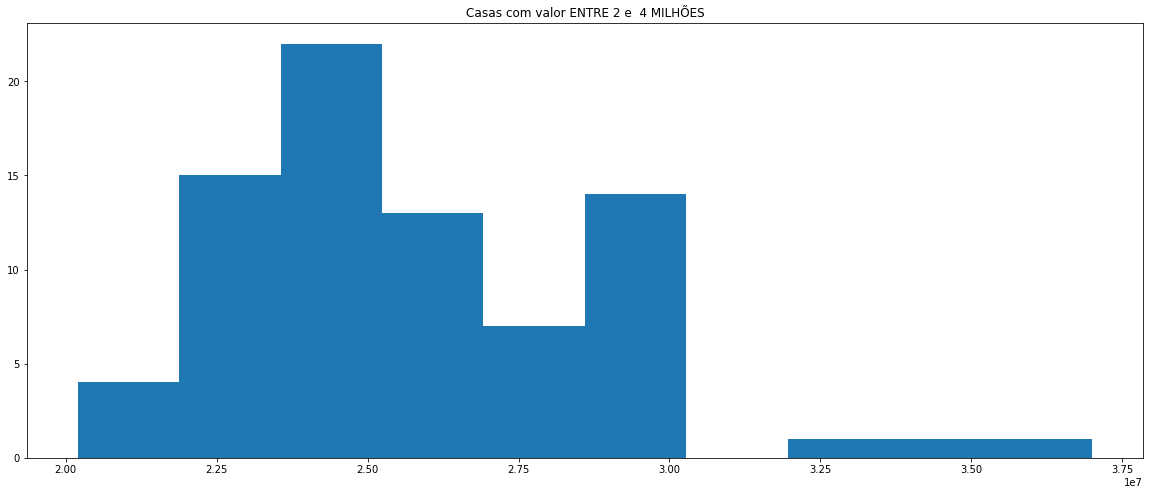

In [ ]:
valor_2m_4m = df_filtrado.loc[(df_filtrado["Valor_anuncio"] > 20000000)  & (df_filtrado["Valor_anuncio"] < 40000000 )]
plt.hist(valor_2m_4m["Valor_anuncio"])
plt.title("Casas com valor ENTRE 2 e  4 MILHÕES")
plt.show()

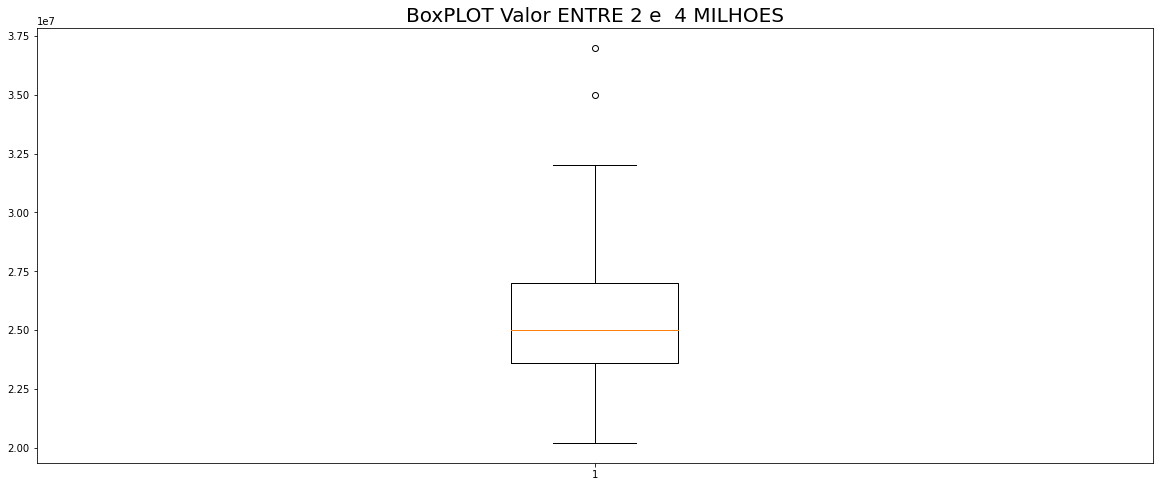

In [ ]:
plt.boxplot(valor_2m_4m["Valor_anuncio"])
plt.title("BoxPLOT Valor ENTRE 2 e  4 MILHOES",fontsize = 20)
plt.show()

In [ ]:
df_filtrado.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [ ]:
df_filtrado["Valor_anuncio"].mean()

3052202.9554390563

## <b>DESAFIOS</b>

### <b>1. DESAFIO:</b> Criar uma escala de valores em milhões.

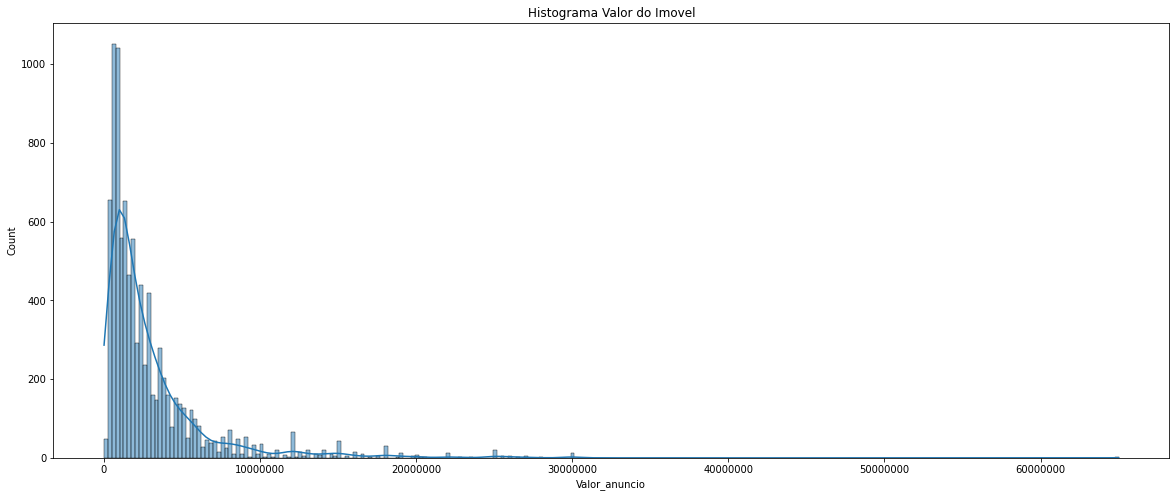

In [ ]:
ax = sns.histplot(data = df_filtrado, x = "Valor_anuncio", kde = True)
ax.set_title("Histograma Valor do Imovel")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [ ]:
df_filtrado.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None


### <b>2. DESAFIO:</b> Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).

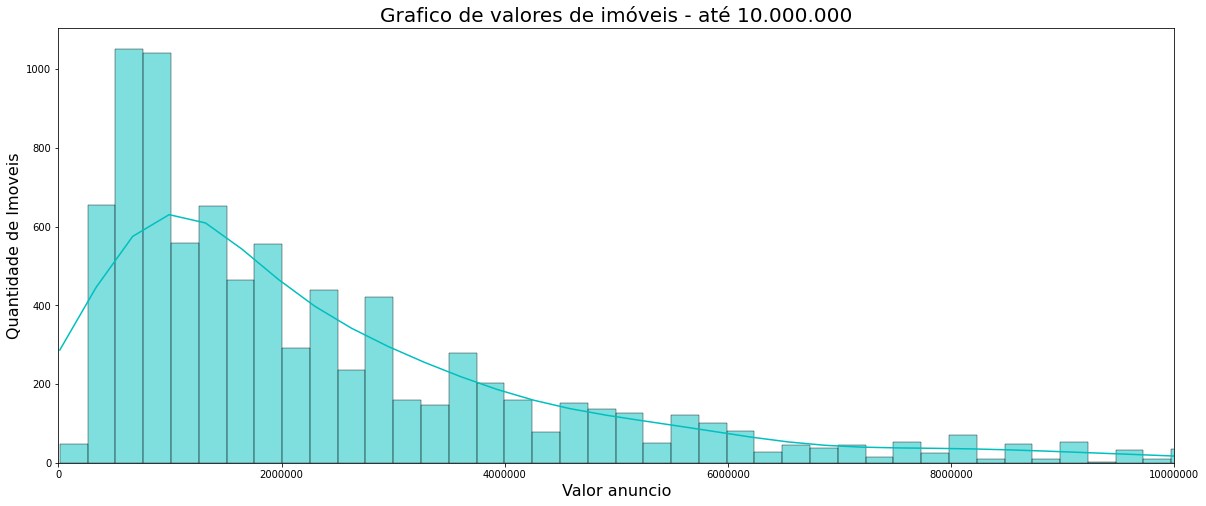

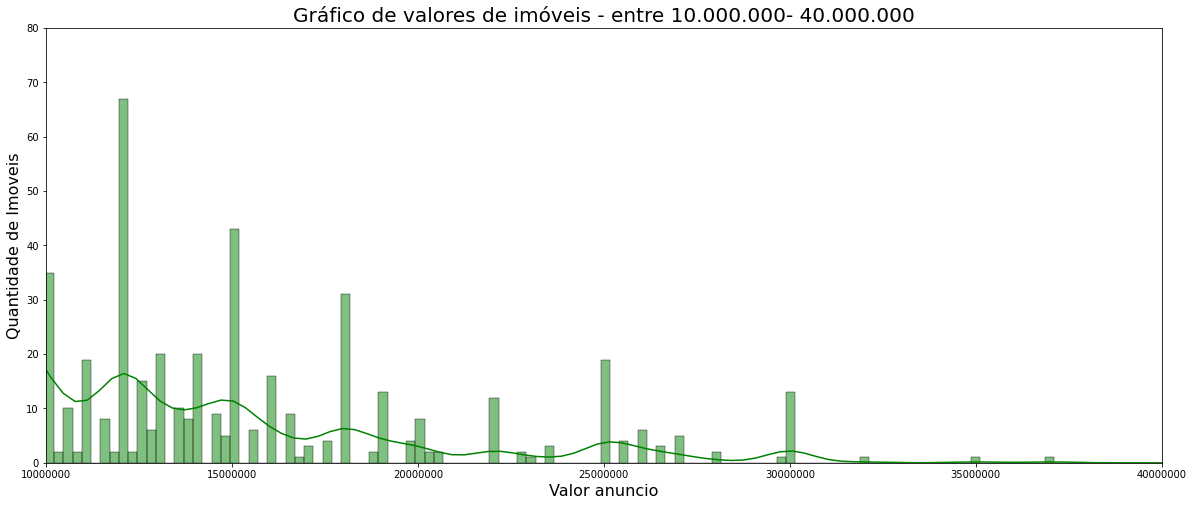

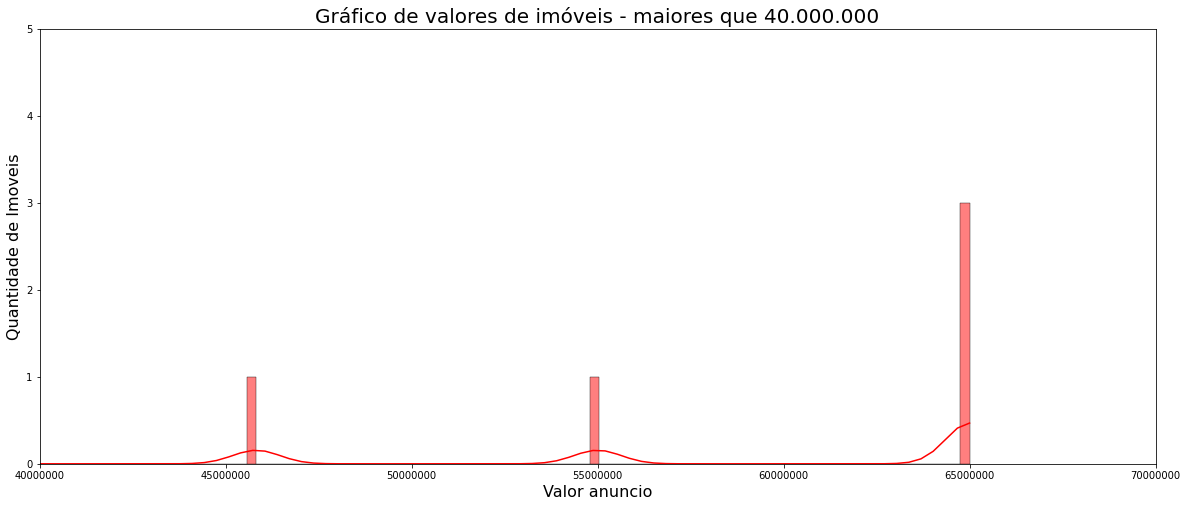

In [ ]:

sns.histplot(data = df_filtrado, x = "Valor_anuncio", kde = True, color ="c" )
plt.title("Grafico de valores de imóveis - até 10.000.000",fontsize = 20)
plt.xlim((0,10000000))
plt.xlabel("Valor anuncio",fontsize = 16)
plt.ylabel("Quantidade de Imoveis",fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

sns.histplot(data = df_filtrado, x = "Valor_anuncio", kde = True, color ="g" )
plt.title("Gráfico de valores de imóveis - entre 10.000.000- 40.000.000",fontsize = 20)
plt.xlim((10000000,40000000))
plt.ylim((0,80))
plt.xlabel("Valor anuncio",fontsize = 16)
plt.ylabel("Quantidade de Imoveis",fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()


sns.histplot(data = df_filtrado, x = "Valor_anuncio", kde = True, color ="r" )
plt.title("Gráfico de valores de imóveis - maiores que 40.000.000",fontsize = 20)
plt.xlim((40000000,70000000))
plt.ylim((0,5))
plt.xlabel("Valor anuncio",fontsize = 16)
plt.ylabel("Quantidade de Imoveis",fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

### <b>3. DESAFIO:</b> Preço do metro quadrado por bairro e plotar em um gráfico ideal. Explorar as bibliotecas de visualizações e colocar as suas conclusão.

In [138]:
df_filtrado["Valor_m2"] = df_filtrado["Valor_anuncio"] /df_filtrado["Metragem"]

In [196]:
m2_por_bairro = df_filtrado.groupby(["Bairro"])["Valor_m2"].mean()
m2_por_bairro = m2_por_bairro.sort_values( ascending=False)
bairros_20 = list(m2_por_bairro.index)

In [199]:
bairros_20[0:10]


['Vila Guaca',
 'Jardim América',
 'Jardim Ampliação',
 'Jardim Europa',
 'Vila Nova Conceição',
 'Jardim Teresa',
 'Jardim Luzitânia',
 'Jardim Paulista',
 'Jardim Paulistano',
 'Itaim Bibi']

In [209]:
df_sample = df_filtrado.query("Bairro == ['Vila Guaca', 'Jardim América', 'Jardim Ampliação', 'Jardim Europa', 'Vila Nova Conceição','Jardim Teresa', 'Jardim Luzitânia', 'Jardim Paulista', 'Jardim Paulistano', 'Itaim Bibi'] " ) 


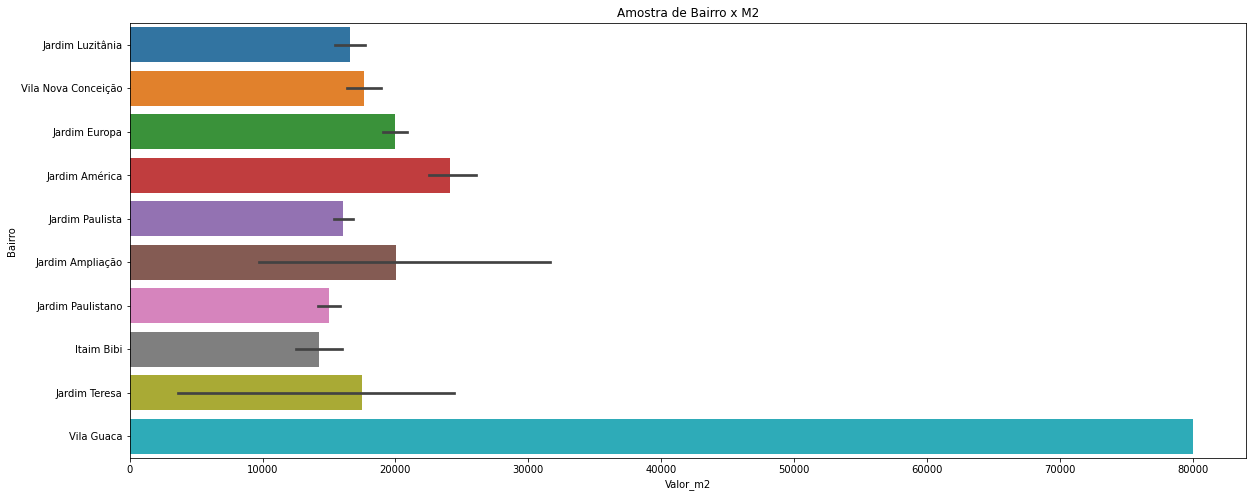

In [210]:
sns.barplot(data = df_sample, y = "Bairro", x="Valor_m2")
plt.title("Amostra de Bairro x M2")
plt.show()

### <b>4. DESAFIO:</b>: Pesquisar um visualização para analisar os quartis, mediana e outliers.C

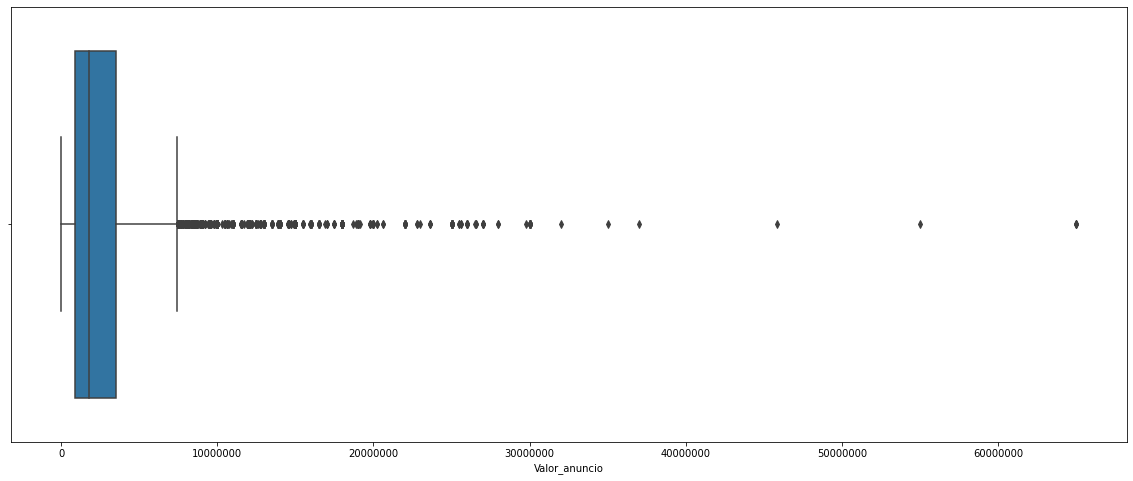

In [ ]:
sns.boxplot(x='Valor_anuncio', data=df_filtrado)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
df_filtrado["Valor_anuncio"].describe()

count       9156.00
mean     3052202.96
std      3944208.19
min        13000.00
25%       890000.00
50%      1800000.00
75%      3500000.00
max     65000000.00
Name: Valor_anuncio, dtype: float64